# Geo

## Import libraries

In [11]:
import pandas as pd
import geopandas as gpd

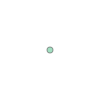

In [12]:
from shapely.geometry import Point
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

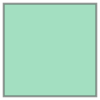

In [13]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])



In [14]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1,0.9))

True

## Read data

In [72]:
property_codes = pd.read_csv('datasets/property_codes.csv')
geoid = gpd.read_file('datasets/SP_Setores_2020/SP_Setores_2020.shp')
demographics = pd.read_csv('datasets/demographics.csv')

In [17]:
property_codes.head()

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,Point,setor_censo
0,0,Rua Alba Valdez,Jardim Reimberg,São Paulo,125.0,4.0,3.0,2.0,380000.0,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14
1,1,Rua Graham Bell,Santo Amaro,São Paulo,440.0,4.0,4.0,6.0,1980000.0,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14
2,2,Rua Graham Bell,Santo Amaro,São Paulo,440.0,4.0,3.0,5.0,1970000.0,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14
3,3,Rua Graham Bell,Santo Amaro,São Paulo,445.0,4.0,3.0,5.0,1970000.0,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14
4,4,Rua Graham Bell,Santo Amaro,São Paulo,440.0,4.0,3.0,5.0,1980000.0,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14


In [21]:
geoid.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,350010505000001,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.07255 -21.68865, -51.07237 -21.6..."
1,350010505000002,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.07378 -21.68620, -51.07388 -21.6..."
2,350010505000003,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.07138 -21.68313, -51.06965 -21.6..."
3,350010505000004,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.06880 -21.68808, -51.06730 -21.6..."
4,350010505000005,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.06969 -21.69442, -51.06928 -21.6..."


In [54]:
# Have a look at a random sample of 10 rows
print(geoid.sample())

# Filter geospatial polygons that belong to the city of Sao Paulo
geoid_sp = geoid[geoid.NM_MUN == "São Paulo"]

# Filter columns relevant to the project
geoid_sp = geoid_sp.drop(['CD_SIT', 'NM_SIT', 'CD_UF', 'NM_UF', 'SIGLA_UF', 'CD_MUN', 'CD_DIST', 'CD_SUBDIST', 'NM_SUBDIST'], axis=1)

# Convert column 'CD_SECTOR' data format from str to int
geoid_sp = geoid_sp.astype({'CD_SETOR':'int'})

# Validation
geoid_sp.head(10)

           CD_SETOR CD_SIT                                        NM_SIT  \
93867  3.551009e+14      1  Área Urbana de Alta Densidade de Edificações   

      CD_UF      NM_UF SIGLA_UF   CD_MUN       NM_MUN    CD_DIST      NM_DIST  \
93867    35  São Paulo       SP  3551009  São Vicente  355100905  São Vicente   

        CD_SUBDIST NM_SUBDIST  \
93867  35510090500       None   

                                                geometry  
93867  POLYGON ((-46.37702 -23.95062, -46.37605 -23.9...  


,CD_SETOR,NM_MUN,NM_DIST,geometry
65509,355030801000001,São Paulo,Água Rasa,"POLYGON ((-46.56954 -23.56918, -46.57016 -23.5..."
65510,355030801000002,São Paulo,Água Rasa,"POLYGON ((-46.56806 -23.56521, -46.56786 -23.5..."
65511,355030801000003,São Paulo,Água Rasa,"POLYGON ((-46.56619 -23.56605, -46.56632 -23.5..."
65512,355030801000004,São Paulo,Água Rasa,"POLYGON ((-46.56876 -23.56856, -46.56863 -23.5..."
65513,355030801000005,São Paulo,Água Rasa,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5..."
65514,355030801000007,São Paulo,Água Rasa,"POLYGON ((-46.57197 -23.57243, -46.57202 -23.5..."
65515,355030801000009,São Paulo,Água Rasa,"POLYGON ((-46.57359 -23.56831, -46.57364 -23.5..."
65516,355030801000010,São Paulo,Água Rasa,"POLYGON ((-46.57327 -23.56550, -46.57191 -23.5..."
65517,355030801000011,São Paulo,Água Rasa,"POLYGON ((-46.56960 -23.56560, -46.57107 -23.5..."
65518,355030801000012,São Paulo,Água Rasa,"POLYGON ((-46.56886 -23.56462, -46.56873 -23.5..."


In [56]:
geoid_sp.dtypes

CD_SETOR       int64
NM_MUN        object
NM_DIST       object
geometry    geometry
dtype: object

In [57]:
# Define point by geographic coordinates
property_codes['Point'] = ''
for i in property_codes.index:
    property_codes['Point'][i] = Point(property_codes['Longitude'][i], property_codes['Latitude'][i])

/tmp/ipykernel_23807/776096508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_codes['Point'][i] = Point(property_codes['Longitude'][i], property_codes['Latitude'][i])


In [58]:
property_codes[geoid.contains(Point(-46.63, -23.58))]

/tmp/ipykernel_23807/2283292414.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  property_codes[geoid.contains(Point(-46.63, -23.58))]


,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,Point,setor_censo


In [60]:
# Map 
property_codes['setor_censo'] = property_codes["Point"].map(lambda x: geoid.loc[geoid.contains(x), 'CD_SETOR'].values).str[0]
property_codes.sample(10)

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,Point,setor_censo
2603,2603,Avenida Santo Albano,Vila Vera,São Paulo,295.0,3.0,4.0,4.0,640000.0,4296000.0,-23.618374,-46.605536,POINT (-46.6055364 -23.6183739),3.550309e+14
1291,1291,Rua Demóstenes,Campo Belo,São Paulo,119.0,2.0,2.0,2.0,850000.0,4614011.0,-23.617599,-46.672261,POINT (-46.6722611 -23.617599),3.550308e+14
3954,3954,Rua Ferdinando Laboriau,Pacaembu,São Paulo,455.0,4.0,4.0,4.0,2350000.0,1250040.0,-23.546908,-46.672203,POINT (-46.6722031 -23.5469077),3.550309e+14
3039,3039,Praça Santos Coimbra,Morumbi,São Paulo,400.0,4.0,4.0,6.0,1920000.0,5614050.0,-23.594667,-46.714212,POINT (-46.7142119 -23.5946673),3.550309e+14
4267,4267,Rua Tanabi,Água Branca,São Paulo,148.0,3.0,3.0,1.0,1200000.0,5002010.0,-20.625054,-49.655217,POINT (-49.6552165 -20.6250537),3.553401e+14
3902,3902,Rua Capitão Macedo,Vila Clementino,São Paulo,258.0,4.0,4.0,5.0,2200000.0,4021020.0,-23.593210,-46.640129,POINT (-46.6401292 -23.5932096),3.550309e+14
2111,2111,Rua Vicente Leporace,Campo Belo,São Paulo,485.0,7.0,8.0,4.0,2750000.0,4619032.0,-23.627245,-46.672365,POINT (-46.6723647 -23.6272452),3.550308e+14
4094,4094,Travessa Doutor Adilson Rodrigues,Vila Mariana,São Paulo,125.0,3.0,2.0,1.0,670000.0,4128010.0,-23.603349,-46.628023,POINT (-46.6280235 -23.6033494),3.550309e+14
3018,3018,Rua Jabebira,Jardim Everest,São Paulo,755.0,5.0,9.0,4.0,8000000.0,5602020.0,-23.581596,-46.703290,POINT (-46.7032896 -23.5815965),3.550309e+14
5378,5378,Rua França Pinto,Vila Mariana,São Paulo,280.0,3.0,3.0,4.0,1600000.0,4016030.0,-23.588116,-46.643428,POINT (-46.643428 -23.5881155),3.550309e+14


In [61]:
property_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5439 entries, 0 to 5438
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5439 non-null   int64  
 1   Rua          5439 non-null   object 
 2   Bairro       5439 non-null   object 
 3   Cidade       5439 non-null   object 
 4   Metragem     5439 non-null   float64
 5   Quartos      5439 non-null   float64
 6   Banheiros    5439 non-null   float64
 7   Vagas        5439 non-null   float64
 8   Valor_BRL    5439 non-null   float64
 9   CEP          5439 non-null   float64
 10  Latitude     5439 non-null   float64
 11  Longitude    5439 non-null   float64
 12  Point        5439 non-null   object 
 13  setor_censo  5435 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 595.0+ KB


In [64]:
property_codes[property_codes['setor_censo'].isnull()]

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,Point,setor_censo
1668,1668,Rua Aquiramum,Alto de Pinheiros,São Paulo,560.0,4.0,4.0,4.0,4500000.0,5446030.0,-14.235004,-51.925280,POINT (-51.92528 -14.235004),NaN
5299,5299,Rua Mangaratiba,Vila Santo Antônio,São Paulo,140.0,3.0,3.0,3.0,1000000.0,4811010.0,-22.959898,-44.041315,POINT (-44.0413146 -22.9598984),NaN
5300,5300,Rua Mangaratiba,Vila Santo Antônio,São Paulo,145.0,3.0,3.0,3.0,1000000.0,4811010.0,-22.959898,-44.041315,POINT (-44.0413146 -22.9598984),NaN
5334,5334,Rua Brazópolis,Jardim Jaú (Zona Leste),São Paulo,184.0,2.0,1.0,2.0,450000.0,3730000.0,-22.521350,-45.638512,POINT (-45.6385125 -22.5213497),NaN


In [69]:
property_codes.dropna(inplace=True)

In [70]:
# Save df to csv
property_codes.to_csv('datasets/property_codes.csv')

In [74]:
# Read full csv file
properties = pd.read_csv('datasets/property_codes.csv')
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  5435 non-null   int64  
 1   Unnamed: 0    5435 non-null   int64  
 2   Rua           5435 non-null   object 
 3   Bairro        5435 non-null   object 
 4   Cidade        5435 non-null   object 
 5   Metragem      5435 non-null   float64
 6   Quartos       5435 non-null   float64
 7   Banheiros     5435 non-null   float64
 8   Vagas         5435 non-null   float64
 9   Valor_BRL     5435 non-null   float64
 10  CEP           5435 non-null   float64
 11  Latitude      5435 non-null   float64
 12  Longitude     5435 non-null   float64
 13  Point         5435 non-null   object 
 14  setor_censo   5435 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 637.0+ KB


In [ ]:
sale_properties["Valor_BRL"] = sale_properties["Valor_Anuncio"].str.replace(".","").astype(float)


In [118]:
properties = properties.astype({'setor_censo': 'int64'})
properties.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Rua              object
Bairro           object
Cidade           object
Metragem        float64
Quartos         float64
Banheiros       float64
Vagas           float64
Valor_BRL       float64
CEP             float64
Latitude        float64
Longitude       float64
Point            object
setor_censo       int64
dtype: object

In [78]:

# Rename columns to improve data legibility
demographics.columns = ['id', 'setor_censo', 'DISTRITO', 'DOMICILIOS', 'MORADORES_SETOR', 'MORADORES_DOMICILIO', 'RENDA_MENSAL']

demographics.set_index('setor_censo')

demographics.sample(10)

,id,setor_censo,DISTRITO,DOMICILIOS,MORADORES_SETOR,MORADORES_DOMICILIO,RENDA_MENSAL
12470,12470,355030865000206,RAPOSO TAVARES,171.0,585.0,3.42,565.54
9261,9261,355030846000224,JARDIM SÃO LUÍS,149.0,545.0,3.66,563.76
11425,11425,355030860000089,PERDIZES,242.0,546.0,2.26,5484.23
2213,2213,355030817000162,CAMPO LIMPO,155.0,430.0,2.77,2591.01
18289,18289,355030896000173,LAJEADO,53.0,184.0,3.47,781.06
5596,5596,355030830000534,GRAJAÚ,67.0,232.0,3.46,694.84
13549,13549,355030870000161,SANTANA,279.0,694.0,2.49,3641.47
9382,9382,355030846000346,JARDIM SÃO LUÍS,138.0,443.0,3.21,5993.47
9271,9271,355030846000234,JARDIM SÃO LUÍS,192.0,630.0,3.28,1058.46
17242,17242,355030891000036,VILA MATILDE,234.0,740.0,3.16,685.71


In [120]:
demographics = demographics.astype({'setor_censo': 'int64'})
demographics.dtypes

id                       int64
setor_censo              int64
DISTRITO                object
DOMICILIOS             float64
MORADORES_SETOR        float64
MORADORES_DOMICILIO    float64
RENDA_MENSAL           float64
dtype: object

In [101]:
properties[properties['setor_censo'] == 355030865000206]

,Unnamed: 0.1,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,Point,setor_censo


In [106]:
# Config display to suppress decimal cases and scientific notation of floats
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [121]:
# Merge demographics and geoids
merged_df = properties.merge(demographics, on = 'setor_censo', how = 'left')

# Merged dataset info
merged_df.info()

# Have a look at a random sample of 10 rows
print(merged_df.sample(10))

# Save merged dataframe as csv
merged_df.to_csv('./datasets/geo_stats.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5435 entries, 0 to 5434
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         5435 non-null   int64  
 1   Unnamed: 0           5435 non-null   int64  
 2   Rua                  5435 non-null   object 
 3   Bairro               5435 non-null   object 
 4   Cidade               5435 non-null   object 
 5   Metragem             5435 non-null   float64
 6   Quartos              5435 non-null   float64
 7   Banheiros            5435 non-null   float64
 8   Vagas                5435 non-null   float64
 9   Valor_BRL            5435 non-null   float64
 10  CEP                  5435 non-null   float64
 11  Latitude             5435 non-null   float64
 12  Longitude            5435 non-null   float64
 13  Point                5435 non-null   object 
 14  setor_censo          5435 non-null   int64  
 15  id                   2425 non-null   f

In [122]:
merged_df.sample(10)

,Unnamed: 0.1,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,...,Latitude,Longitude,Point,setor_censo,id,DISTRITO,DOMICILIOS,MORADORES_SETOR,MORADORES_DOMICILIO,RENDA_MENSAL
5054,5055,5055,Rua João Bertacchi,Jardim Cristal,São Paulo,241.00,2.00,1.00,2.00,361200.00,...,-23.69,-46.70,POINT (-46.6967948 -23.6948551),355030823000378,NaN,NaN,NaN,NaN,NaN,NaN
2985,2986,2986,Rua Cuba,Jardim América,São Paulo,301.00,4.00,5.00,4.00,4200000.00,...,-23.57,-46.67,POINT (-46.6690816 -23.5745244),355030845000271,NaN,NaN,NaN,NaN,NaN,NaN
1781,1782,1782,Rua Carlos Rath,Alto de Pinheiros,São Paulo,400.00,4.00,3.00,4.00,3450000.00,...,-23.56,-46.70,POINT (-46.7041773 -23.561089),355030802000141,NaN,NaN,NaN,NaN,NaN,NaN
3334,3335,3335,Avenida Aratãs,Indianópolis,São Paulo,210.00,3.00,4.00,8.00,1490000.00,...,-23.61,-46.66,POINT (-46.6580085 -23.6133603),355030832000373,NaN,NaN,NaN,NaN,NaN,NaN
3415,3416,3416,Rua Doutor Ambrógio Bonomi,Vila Leopoldina,São Paulo,236.00,2.00,3.00,2.00,1100000.00,...,-23.53,-46.74,POINT (-46.7358448 -23.5300265),355030888000130,NaN,NaN,NaN,NaN,NaN,NaN
4729,4730,4730,Rua Guararema,Bosque da Saúde,São Paulo,300.00,3.00,2.00,3.00,900000.00,...,-23.41,-46.04,POINT (-46.0373872 -23.411688),351830505000002,NaN,NaN,NaN,NaN,NaN,NaN
4800,4801,4801,Rua Rosalino Silva,Jardim Itapeva,São Paulo,134.00,3.00,3.00,3.00,620000.00,...,-23.66,-46.69,POINT (-46.6869035 -23.6649847),355030816000310,NaN,NaN,NaN,NaN,NaN,NaN
1787,1788,1788,Rua Alfredo Piragibe,Vila Madalena,São Paulo,469.00,5.00,7.00,3.00,2800000.00,...,-23.55,-46.70,POINT (-46.6980037 -23.5481362),355030802000081,NaN,NaN,NaN,NaN,NaN,NaN
2713,2714,2714,Avenida Iraí,Indianópolis,São Paulo,425.00,4.00,7.00,4.00,1800000.00,...,-23.61,-46.66,POINT (-46.6582054 -23.6145681),355030877000494,NaN,NaN,NaN,NaN,NaN,NaN
683,683,683,Rua Francisco Dias Velho,Vila Cordeiro,São Paulo,205.00,1.00,2.00,2.00,1600000.00,...,-23.62,-46.69,POINT (-46.6888408 -23.6179965),355030835000369,NaN,NaN,NaN,NaN,NaN,NaN
